In [2]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import the OpenWeatherMap API key
from api_keys import weather_api_key, visualcrossing_key


In [13]:
# Set the API base URL
url = f"https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/dayton%2520oregon/2023-07-01/2023-08-19?elements=datetime%2CdatetimeEpoch%2Ctemp%2Ctempmax%2Ctempmin%2Cprecip%2Cwindspeed%2Cwindgust%2Cfeelslike%2Cfeelslikemax%2Cfeelslikemin%2Cpressure%2Cstations%2Cdegreedays%2Caccdegreedays&include=fcst%2Cobs%2Chistfcst%2Cstats%2Chours&key={visualcrossing_key}&options=preview&contentType=json"

dayton = requests.get(url)

In [14]:
dayton_df = pd.DataFrame(dayton)
print(dayton_df[0])

0    b'You have exceeded the maximum number of dail...
1                                           b'esults.'
Name: 0, dtype: object


In [3]:

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | constantia
Processing Record 4 of Set 1 | renfrew
Processing Record 5 of Set 1 | kuraymah
Processing Record 6 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 7 of Set 1 | wang sai phun
Processing Record 8 of Set 1 | horta
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | livingston
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | alice springs
Processing Record 14 of Set 1 | san rafael
Processing Record 15 of Set 1 | college station
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | alice town
Processing Record 18 of Set 1 | springs
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | kachug
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.08,91,100,12.39,GS,1682905996
1,waitangi,-43.9535,-176.5597,16.01,88,0,0.89,NZ,1682905997
2,constantia,44.1833,28.6500,7.61,64,29,4.00,RO,1682905997
3,renfrew,55.8720,-4.3925,11.75,90,100,2.57,GB,1682905997
4,kuraymah,18.5500,31.8500,22.18,14,29,4.50,SD,1682905997


In [21]:
# Check if directory exists, if not, make new directory
if not os.path.exists("Output_data"):
    os.mkdir("Output_data")
    output_path = os.path.join(os.getcwd(),'WeatherPy','Output_data')
    print("Created directory" + output_path)
else:
    output_path = os.path.join(os.getcwd(),'WeatherPy','Output_data')
    print(f"{output_path} directory already exists")
 
# Export the City_Data into a csv
city_data_df.to_csv("Output_data/cities.csv", index_label="City_ID")

Created directory/Users/michaelnaffziger/Desktop/Homework UO Bootcamp/python-api-challenge/WeatherPy/WeatherPy/Output_data


In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.08,91,100,12.39,GS,1682905996
1,waitangi,-43.9535,-176.5597,16.01,88,0,0.89,NZ,1682905997
2,constantia,44.1833,28.6500,7.61,64,29,4.00,RO,1682905997
3,renfrew,55.8720,-4.3925,11.75,90,100,2.57,GB,1682905997
4,kuraymah,18.5500,31.8500,22.18,14,29,4.50,SD,1682905997


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

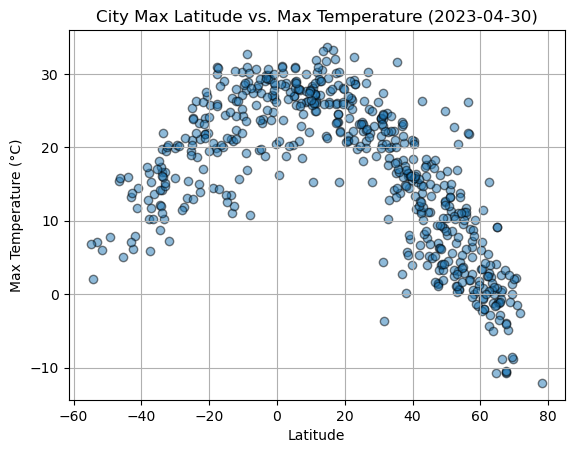

In [23]:
#Create a date stamp for when plot was generated
import datetime
now = datetime.datetime.now()
date_string = now.strftime("%Y-%m-%d")


# Reading on, I noticed this got VERY repeatitive, so I made a function to the repeativite tasks
def city_scatter(city_data_df, y_col):
    
    # Originally I had the y_axis data and labe as input() strings...
    # but it got too annoying, so I hardcoded them for this assignment
    y_axis_complete = f"{y_axis_title} {y_axis_units}"
    plt.scatter(
        city_data_df["Lat"],
        city_data_df[y_col],
        edgecolors='black',
        marker= "o",
        alpha= 0.5,
        label = "Cities"
    )
    plt.ylabel(y_axis_complete)
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.title(f"City Max Latitude vs. {y_axis_title} ({date_string})")

    plt.savefig(f"output_data/Fig{fig_num} City {y_col} {date_string}.png")

    plt.show()

y_col = "Max Temp"
y_axis_units = "(°C)"
y_axis_title = "Max Temperature"
fig_num = "1"
city_scatter(city_data_df,y_col)

#### Latitude Vs. Humidity

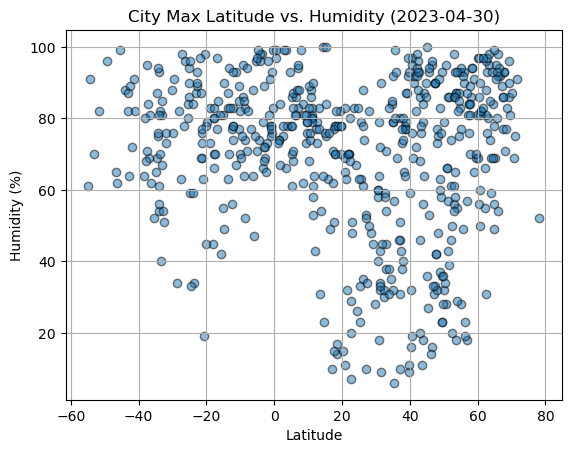

In [24]:
# # Build the scatter plots for latitude vs. humidity

y_col = "Humidity"
y_axis_units = "(%)"
y_axis_title = "Humidity"
fig_num = "2"
city_scatter(city_data_df,y_col)

#### Latitude Vs. Cloudiness

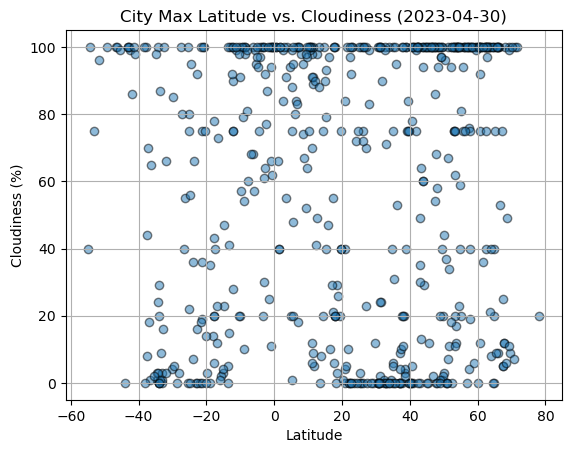

In [25]:
# # Build the scatter plots for latitude vs. cloudiness
y_col = "Cloudiness"
y_axis_units = "(%)"
y_axis_title = "Cloudiness"
fig_num = "3"
city_scatter(city_data_df,y_col)

#### Latitude vs. Wind Speed Plot

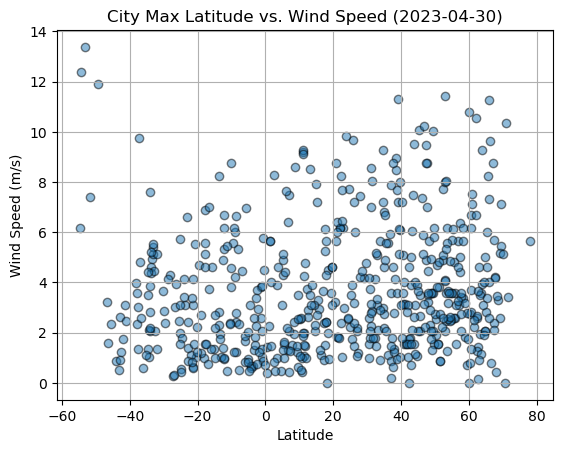

In [26]:
# Build the scatter plots for latitude vs. wind speed
y_col = "Wind Speed"
y_axis_units = "(m/s)"
y_axis_title = "Wind Speed"
fig_num = "4"
city_scatter(city_data_df,y_col)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots

## SO NOW you want me to create a function... i see :)
def hemi_city_scatter(hemi_df, y_col):
    y_axis_complete = f"{y_axis_title} {y_axis_units}"
    
    # Create variables for linear regression equation to print onto plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemi_df['Lat'],hemi_df[y_col])
    y_values = hemi_df['Lat']*slope + intercept
    line_eq= f" y = {round(slope,2)}x + {round(intercept,2)}"
    r_squarred = str(round(rvalue**2,8))
    
    #make plot
    plt.scatter(
        hemi_df['Lat'],
        hemi_df[y_col],
        edgecolors='black',
        marker= "o",
        alpha= 0.5,
        label = "Cities" 
    )
    #Regression line 
    plt.plot(hemi_df['Lat'],y_values,color='red')
    plt.annotate(line_eq,(place),fontsize=12,color="red")
    
    #Label formatting
    plt.ylabel(y_axis_complete)
    plt.xlabel("Latitude")
    plt.grid(True)
    plt.title(f"{Hemisphere} Hemisphere City Max Latitude vs. {y_axis_title} ({date_string})")
    
    plt.savefig(f"output_data/Fig{fig_num} {Hemisphere}-hemi {y_col} {date_string}.png")

    plt.show()
    print(f"The r-value is {r_squarred}")



In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,constantia,44.1833,28.6500,7.61,64,29,4.00,RO,1682905997
3,renfrew,55.8720,-4.3925,11.75,90,100,2.57,GB,1682905997
4,kuraymah,18.5500,31.8500,22.18,14,29,4.50,SD,1682905997
5,wang sai phun,16.3885,100.5380,33.23,49,10,1.12,TH,1682905998
6,horta,38.5333,-28.6333,16.12,78,3,8.94,PT,1682905716


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.08,91,100,12.39,GS,1682905996
1,waitangi,-43.9535,-176.5597,16.01,88,0,0.89,NZ,1682905997
7,punta arenas,-53.1500,-70.9167,7.06,70,75,13.38,CL,1682905868
10,puerto natales,-51.7236,-72.4875,5.99,82,96,7.40,CL,1682905999
11,alice springs,-23.7000,133.8833,18.75,34,66,3.09,AU,1682905999


###  Temperature vs. Latitude Linear Regression Plot

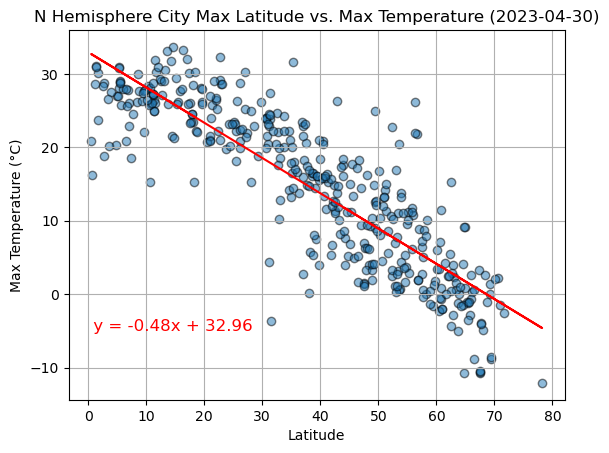

The r-value is 0.74615925


In [43]:
# Linear regression on Northern Hemisphere
hemi_df = northern_hemi_df
Hemisphere = "N"
y_col = "Max Temp"
y_axis_units = "(°C)"
y_axis_title = "Max Temperature"
fig_num = "1"
place =(0,-5)
hemi_city_scatter(hemi_df, y_col)

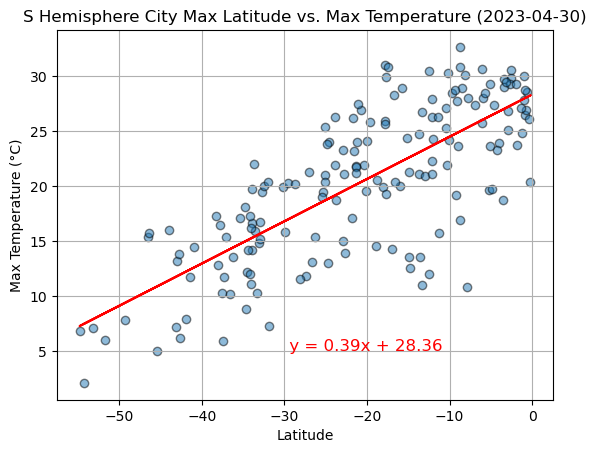

The r-value is 0.57650763


In [44]:
# Linear regression on Southern Hemisphere
hemi_df = southern_hemi_df
Hemisphere = "S"
y_col = "Max Temp"
y_axis_units = "(°C)"
y_axis_title = "Max Temperature"
fig_num = "1"
place =(-30,5)
hemi_city_scatter(hemi_df, y_col)

## **Discussion about the linear relationship:** 

- There is a corresponding relationship between distance from the equator and the max temperature recorded
- There are more cities represented in the northern hemisphere, providing a tighter r-value

### Humidity vs. Latitude Linear Regression Plot

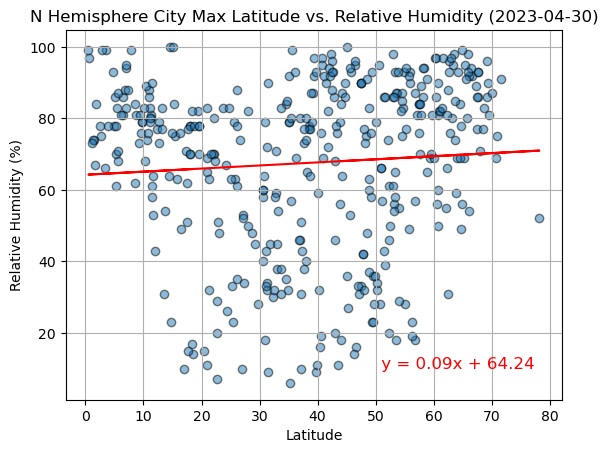

The r-value is 0.00490331


In [45]:
# Northern Hemisphere
hemi_df = northern_hemi_df
Hemisphere = "N"
y_col = "Humidity"
y_axis_units = "(%)"
y_axis_title = "Relative Humidity"
fig_num = "2"
place =(50,10)
hemi_city_scatter(hemi_df, y_col)

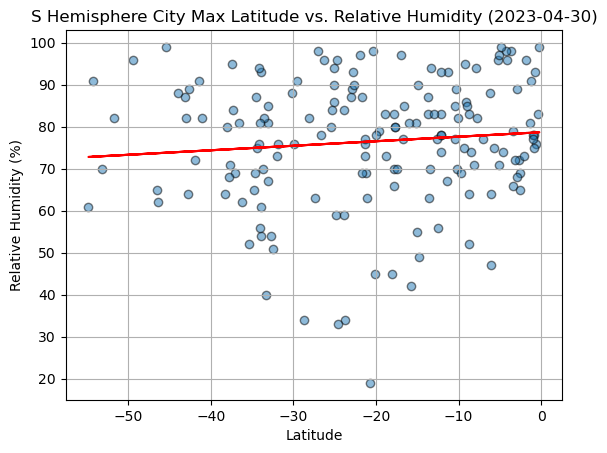

The r-value is 0.00963526


In [50]:
# Southern Hemisphere
hemi_df = southern_hemi_df
Hemisphere = "S"
y_col = "Humidity"
y_axis_units = "(%)"
y_axis_title = "Relative Humidity"
fig_num = "2"
place =(50,10)
hemi_city_scatter(hemi_df, y_col)

## **Discussion about the linear relationship:**
- There does not seem to be a tight relationship between a hemisphere's humidity and latitude
- This is most litely due to the humidity being recorded as relative humidity and not absolute.  Relative humidy only represents how mush water vapor the air can hold.  This is dependant on temperature, the warmer the air, the more water vapor it can hold.
- The humidity plots, however, do suggest that cities closer to the equator are hotter than cities closer to the poles.

### Cloudiness vs. Latitude Linear Regression Plot

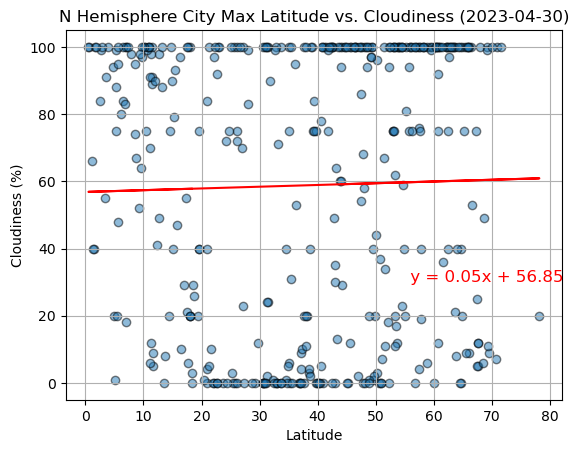

The r-value is 0.00058848


In [53]:
# Northern Hemisphere
hemi_df = northern_hemi_df
Hemisphere = "N"
y_col = "Cloudiness"
y_axis_units = "(%)"
y_axis_title = "Cloudiness"
fig_num = "3"
place =(55,30)
hemi_city_scatter(hemi_df, y_col)

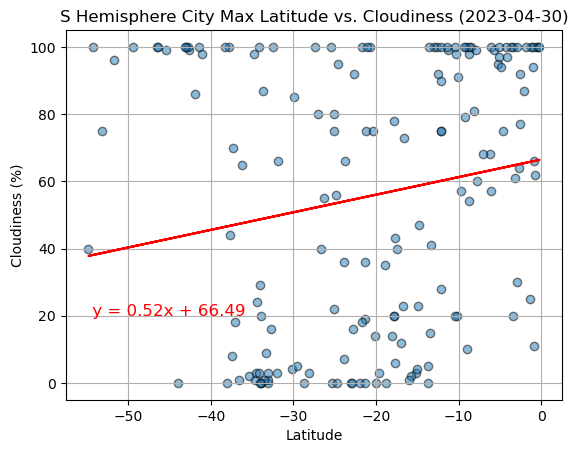

The r-value is 0.03250192


In [57]:
# Southern Hemisphere
hemi_df = southern_hemi_df
Hemisphere = "S"
y_col = "Cloudiness"
y_axis_units = "(%)"
y_axis_title = "Cloudiness"
fig_num = "3"
place =(-55,20)
hemi_city_scatter(hemi_df, y_col)

## **Discussion about the linear relationship:**

- There is a weak but positive relationship between cloudiness and latitude
- These charts show that the cloudiest areas are located near the equator and closer to the artic/antartic circles
- Locations with the least amount of cloudy days are between 30° and 40° above the equator.
- This trend can be explained by typical atmospheric water quantities.  At the extremes, there are either either hot humid water vapor mixing with cold regional temps, or cold air mixing with hot humid air: both of these situations will produce clouds, and generate weather events.

### Wind Speed vs. Latitude Linear Regression Plot

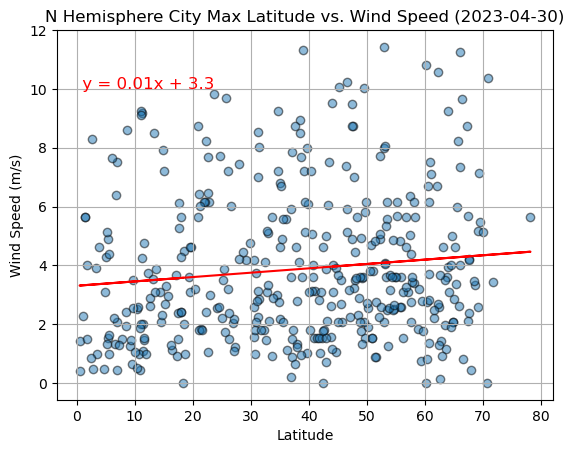

The r-value is 0.01324875


In [59]:
# Northern Hemisphere
hemi_df = northern_hemi_df
Hemisphere = "N"
y_col = "Wind Speed"
y_axis_units = "(m/s)"
y_axis_title = "Wind Speed"
fig_num = "4"
place =(0,10)
hemi_city_scatter(hemi_df, y_col)

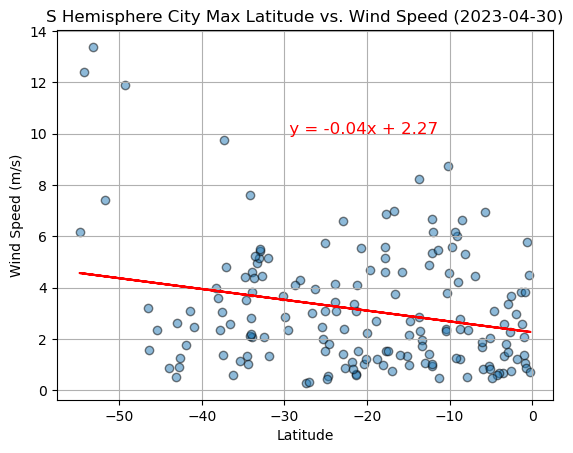

The r-value is 0.06030105


In [61]:
# Southern Hemisphere
hemi_df = southern_hemi_df
Hemisphere = "S"
y_col = "Wind Speed"
y_axis_units = "(m/s)"
y_axis_title = "Wind Speed"
fig_num = "4"
place =(-30,10)
hemi_city_scatter(hemi_df, y_col)

## **Discussion about the linear relationship:**

Though there is a weak relationship observed between the wind speed and latitude, a couple of observations can be concluded:
- The northern hemishpere has more land above sea level than the southern hemisphere.  This affects windspeeds not only by topography, but also by the difference in land and water caputuring and holding onto heat from the sun.  This dynamic is the cause of wind, and fuels the high and low pressure zones.
- When the outliers are -roughly- removed from the plots by inspection (lostly the reported wind speed above 7 m/s), the general trend is that the farther from the equator you are, the higher the wind speeds will be.
- The high variability of the northern hemisphere vs the southern hemisphere can be related to more above sea level mass.  Since the southern hemisphere has more water, it can regulate a steadier temperature, and does not interact as must with the land absorbing/releasing heat as much- therefore providing a tighter grouping than the northern hemisphere data.